<h1>DATA ANALYSIS OF NEW YORK CITI BIKERS IN PYTHON AND SQL </h1>


# Install software libraries

In [1]:
!pip install seaborn

# Import software libraries

In [2]:
import pandas as pd
import sqlalchemy
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
%load_ext sql

# Create a SQLite database

In [4]:
engine = sqlalchemy.create_engine('sqlite:///citibikes.db')

# Connect to the SQLite database

In [5]:
%sql sqlite:///citibikes.db

# Load the dataset as a `DataFrame`

In [6]:
NY_Citi_Bikes_data=pd.read_csv('Datasets/New York Citi Bikes_Raw Data - NYCitiBikes (1).csv')

In [7]:
NY_Citi_Bikes_data.head(3)

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,01-01-17 00:38,1-1-17 01:03,3194,McGinley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,01-01-17 01:47,01-01-17 01:58,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
2,01-01-17 01:47,01-01-17 01:58,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday


# Store the DataFrame in the SQLite database

In [8]:
NY_Citi_Bikes_data.to_sql('NYCitiBikesdata', con=engine, if_exists='replace')

20400

# Connect to the sqlite database

In [9]:
conn = sqlite3.connect('citibikes.db') 

In [10]:
cursor=conn.cursor() 

# Get the list of tables and columns from the database

In [11]:
cursor.execute('''select name from sqlite_master where type='table';''')
print('List of tables present in the database')
table_list=[table[0]for table in cursor.fetchall()]
table_list

List of tables present in the database


['CleanedNYCitiBikesdata', 'NYCitiBikesdata']

In [12]:
for table in table_list:
    print("\ntable: " + table)
    columns_info= conn.execute("PRAGMA table_info({})".format(table))
    for column in columns_info.fetchall():
        print(column[1:3])


table: CleanedNYCitiBikesdata
('level_0', 'BIGINT')
('index', 'BIGINT')
('Start Time', 'TEXT')
('Stop Time', 'TEXT')
('Start Station ID', 'BIGINT')
('Start Station Name', 'TEXT')
('End Station ID', 'BIGINT')
('End Station Name', 'TEXT')
('Bike ID', 'BIGINT')
('User Type', 'TEXT')
('Birth Year', 'BIGINT')
('Age', 'BIGINT')
('Age Groups', 'TEXT')
('Trip Duration', 'BIGINT')
('Trip_Duration_in_min', 'BIGINT')
('Month', 'BIGINT')
('Season', 'TEXT')
('Temperature', 'BIGINT')
('Weekday', 'TEXT')

table: NYCitiBikesdata
('index', 'BIGINT')
('Start Time', 'TEXT')
('Stop Time', 'TEXT')
('Start Station ID', 'BIGINT')
('Start Station Name', 'TEXT')
('End Station ID', 'BIGINT')
('End Station Name', 'TEXT')
('Bike ID', 'BIGINT')
('User Type', 'TEXT')
('Birth Year', 'BIGINT')
('Age', 'BIGINT')
('Age Groups', 'TEXT')
('Trip Duration', 'BIGINT')
('Trip_Duration_in_min', 'TEXT')
('Month', 'BIGINT')
('Season', 'TEXT')
('Temperature', 'BIGINT')
('Weekday', 'TEXT')


In [13]:
# Get only the column names
print('\nColumns in NYCitiBikesdata table:')
data=cursor.execute('''SELECT * FROM NYCitiBikesdata''')
for column in data.description:
    print(column[0])


Columns in NYCitiBikesdata table:
index
Start Time
Stop Time
Start Station ID
Start Station Name
End Station ID
End Station Name
Bike ID
User Type
Birth Year
Age
Age Groups
Trip Duration
Trip_Duration_in_min
Month
Season
Temperature
Weekday


# Read the database as a dataframe

In [14]:
NY_Citi_Bikes_data = pd.read_sql_query('''select * from NYCitiBikesdata ''', conn)
NY_Citi_Bikes_data.head(3)

,index,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,0,01-01-17 00:38,1-1-17 01:03,3194,McGinley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,1,01-01-17 01:47,01-01-17 01:58,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
2,2,01-01-17 01:47,01-01-17 01:58,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday


In [15]:
NY_Citi_Bikes_data_wt_duplicates = pd.read_sql_query('''
                                       SELECT DISTINCT * FROM NYCitiBikesdata
                                       GROUP BY `Start Time`,`Stop Time`, `Start Station ID`,`Start Station Name`,
                                       `End Station ID`, `End Station Name`,`Bike ID`, `User Type`,`Birth Year`,
                                       `Age`, `Age Groups`,`Trip Duration`, `Trip_Duration_in_min`,`Month`,
                                       `Season`, `Temperature`, `Weekday`
                                        HAVING COUNT(*)=1
                                        ''', conn)
NY_Citi_Bikes_data_wt_duplicates

,index,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,0,01-01-17 00:38,1-1-17 01:03,3194,McGinley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,3,01-01-17 01:56,01-01-17 02:00,3186,Grove St PATH,3270,Jersey & 6th St,24604,Subscriber,1970,51,45-54,258,4,1,Winter,10,Sunday
2,5,01-01-17 02:22,1-1-17 02:31,3212,Christ Hospital,3225,Baldwin at Montgomery,24520,Subscriber,1987,34,25-34,535,9,1,Winter,10,Sunday
3,6,01-01-17 02:23,01-01-17 02:27,3186,Grove St PATH,3203,Hamilton Park,24512,Subscriber,1984,37,35-44,224,4,1,Winter,10,Sunday
4,11,01-01-17 06:29,01-01-17 06:31,3186,Grove St PATH,3211,Newark Ave,24681,Subscriber,1964,57,55-64,107,2,1,Winter,10,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16606,14832,9-3-17 20:48,09-03-17 20:50,3273,Manila & 1st,3211,Newark Ave,24609,Subscriber,1964,57,55-64,129,2,3,Spring,19,Thursday
16607,14833,9-3-17 20:48,09-03-17 21:00,3187,Warren St,3220,5 Corners Library,24528,Subscriber,1991,30,25-34,743,12,3,Spring,19,Thursday
16608,14841,9-3-17 21:19,09-03-17 21:23,3275,Columbus Drive,3184,Paulus Hook,24617,Subscriber,1960,61,55-64,261,4,3,Spring,19,Thursday
16609,14844,9-3-17 21:23,09-03-17 21:30,3220,5 Corners Library,3281,Leonard Gordon Park,24528,Subscriber,1996,25,25-34,424,7,3,Spring,19,Thursday


# Identify and handle missing values

In the dataset, missing data comes with the question mark "?". We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Here we use the function:
.replace(A, B, inplace = True) 
to replace A by B.

In [16]:
import numpy as np

# replace "?" to NaN
NY_Citi_Bikes_data_wt_duplicates.replace("?", np.nan, inplace = True)


# Evaluating for Missing Data

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

.isnull()
.notnull()
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [17]:
missing_data =NY_Citi_Bikes_data_wt_duplicates.isnull()
missing_data.head(5)

,index,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


"True" means the value is a missing value while "False" means the value is not a missing value.

# Count missing values in each column

Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset. In the body of the for loop the method ".value_counts()" counts the number of "True" values.

In [18]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

index
index
False    16611
Name: count, dtype: int64

Start Time
Start Time
False    16611
Name: count, dtype: int64

Stop Time
Stop Time
False    16611
Name: count, dtype: int64

Start Station ID
Start Station ID
False    16611
Name: count, dtype: int64

Start Station Name
Start Station Name
False    16611
Name: count, dtype: int64

End Station ID
End Station ID
False    16611
Name: count, dtype: int64

End Station Name
End Station Name
False    16610
True         1
Name: count, dtype: int64

Bike ID
Bike ID
False    16611
Name: count, dtype: int64

User Type
User Type
False    16611
Name: count, dtype: int64

Birth Year
Birth Year
False    16611
Name: count, dtype: int64

Age
Age
False    16611
Name: count, dtype: int64

Age Groups
Age Groups
False    16611
Name: count, dtype: int64

Trip Duration
Trip Duration
False    16611
Name: count, dtype: int64

Trip_Duration_in_min
Trip_Duration_in_min
False    16611
Name: count, dtype: int64

Month
Month
False    16611
Name: count, dtype: in

Based on the summary above, each column has 16611 rows of data and only one of the columns containing missing data:

<ul>
    <li>"End Station Name": 1 missing data</li>
</ul>
To deal with this missing data, we will be deleting the entire row
let's drop all rows that do not have End Station Name data

In [19]:
# Drop whole row with NaN in "End Station Name" column
NY_Citi_Bikes_data_wt_duplicates.dropna(subset=["End Station Name"], axis=0, inplace=True)

# reset index, because we droped one row
NY_Citi_Bikes_data_wt_duplicates.reset_index(drop=True, inplace=True)

In [20]:
NY_Citi_Bikes_data_wt_duplicates

,index,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,0,01-01-17 00:38,1-1-17 01:03,3194,McGinley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,3,01-01-17 01:56,01-01-17 02:00,3186,Grove St PATH,3270,Jersey & 6th St,24604,Subscriber,1970,51,45-54,258,4,1,Winter,10,Sunday
2,5,01-01-17 02:22,1-1-17 02:31,3212,Christ Hospital,3225,Baldwin at Montgomery,24520,Subscriber,1987,34,25-34,535,9,1,Winter,10,Sunday
3,6,01-01-17 02:23,01-01-17 02:27,3186,Grove St PATH,3203,Hamilton Park,24512,Subscriber,1984,37,35-44,224,4,1,Winter,10,Sunday
4,11,01-01-17 06:29,01-01-17 06:31,3186,Grove St PATH,3211,Newark Ave,24681,Subscriber,1964,57,55-64,107,2,1,Winter,10,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16605,14832,9-3-17 20:48,09-03-17 20:50,3273,Manila & 1st,3211,Newark Ave,24609,Subscriber,1964,57,55-64,129,2,3,Spring,19,Thursday
16606,14833,9-3-17 20:48,09-03-17 21:00,3187,Warren St,3220,5 Corners Library,24528,Subscriber,1991,30,25-34,743,12,3,Spring,19,Thursday
16607,14841,9-3-17 21:19,09-03-17 21:23,3275,Columbus Drive,3184,Paulus Hook,24617,Subscriber,1960,61,55-64,261,4,3,Spring,19,Thursday
16608,14844,9-3-17 21:23,09-03-17 21:30,3220,5 Corners Library,3281,Leonard Gordon Park,24528,Subscriber,1996,25,25-34,424,7,3,Spring,19,Thursday


Good! Now, we have a dataset with no duplicates and no missing values.

# Check to see if all data formats are correct

In [21]:
NY_Citi_Bikes_data_wt_duplicates.dtypes

index                    int64
Start Time              object
Stop Time               object
Start Station ID         int64
Start Station Name      object
End Station ID           int64
End Station Name        object
Bike ID                  int64
User Type               object
Birth Year               int64
Age                      int64
Age Groups              object
Trip Duration            int64
Trip_Duration_in_min    object
Month                    int64
Season                  object
Temperature              int64
Weekday                 object
dtype: object

In [22]:
NY_Citi_Bikes_data_wt_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16610 entries, 0 to 16609
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 16610 non-null  int64 
 1   Start Time            16610 non-null  object
 2   Stop Time             16610 non-null  object
 3   Start Station ID      16610 non-null  int64 
 4   Start Station Name    16610 non-null  object
 5   End Station ID        16610 non-null  int64 
 6   End Station Name      16610 non-null  object
 7   Bike ID               16610 non-null  int64 
 8   User Type             16610 non-null  object
 9   Birth Year            16610 non-null  int64 
 10  Age                   16610 non-null  int64 
 11  Age Groups            16610 non-null  object
 12  Trip Duration         16610 non-null  int64 
 13  Trip_Duration_in_min  16610 non-null  object
 14  Month                 16610 non-null  int64 
 15  Season                16610 non-null

In [23]:
#NY_Citi_Bikes_data_wt_duplicates['Start Time']=pd.to_datetime(NY_Citi_Bikes_data_wt_duplicates['Start Time'], format='%d-%m-%Y %H:%M')

Remove all commas from the column 'Trip_Duration_in_min'

In [24]:
#Remove all commas from the column 
NY_Citi_Bikes_data_wt_duplicates['Trip_Duration_in_min']=\
NY_Citi_Bikes_data_wt_duplicates['Trip_Duration_in_min'].str.replace(',','')


In [25]:
#Change the column data type to int64
NY_Citi_Bikes_data_wt_duplicates['Trip_Duration_in_min']=\
NY_Citi_Bikes_data_wt_duplicates['Trip_Duration_in_min'].astype('int64')

In [26]:
NY_Citi_Bikes_data_wt_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16610 entries, 0 to 16609
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 16610 non-null  int64 
 1   Start Time            16610 non-null  object
 2   Stop Time             16610 non-null  object
 3   Start Station ID      16610 non-null  int64 
 4   Start Station Name    16610 non-null  object
 5   End Station ID        16610 non-null  int64 
 6   End Station Name      16610 non-null  object
 7   Bike ID               16610 non-null  int64 
 8   User Type             16610 non-null  object
 9   Birth Year            16610 non-null  int64 
 10  Age                   16610 non-null  int64 
 11  Age Groups            16610 non-null  object
 12  Trip Duration         16610 non-null  int64 
 13  Trip_Duration_in_min  16610 non-null  int64 
 14  Month                 16610 non-null  int64 
 15  Season                16610 non-null

In [27]:
NY_Citi_Bikes_data_wt_duplicates

,index,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,0,01-01-17 00:38,1-1-17 01:03,3194,McGinley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,3,01-01-17 01:56,01-01-17 02:00,3186,Grove St PATH,3270,Jersey & 6th St,24604,Subscriber,1970,51,45-54,258,4,1,Winter,10,Sunday
2,5,01-01-17 02:22,1-1-17 02:31,3212,Christ Hospital,3225,Baldwin at Montgomery,24520,Subscriber,1987,34,25-34,535,9,1,Winter,10,Sunday
3,6,01-01-17 02:23,01-01-17 02:27,3186,Grove St PATH,3203,Hamilton Park,24512,Subscriber,1984,37,35-44,224,4,1,Winter,10,Sunday
4,11,01-01-17 06:29,01-01-17 06:31,3186,Grove St PATH,3211,Newark Ave,24681,Subscriber,1964,57,55-64,107,2,1,Winter,10,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16605,14832,9-3-17 20:48,09-03-17 20:50,3273,Manila & 1st,3211,Newark Ave,24609,Subscriber,1964,57,55-64,129,2,3,Spring,19,Thursday
16606,14833,9-3-17 20:48,09-03-17 21:00,3187,Warren St,3220,5 Corners Library,24528,Subscriber,1991,30,25-34,743,12,3,Spring,19,Thursday
16607,14841,9-3-17 21:19,09-03-17 21:23,3275,Columbus Drive,3184,Paulus Hook,24617,Subscriber,1960,61,55-64,261,4,3,Spring,19,Thursday
16608,14844,9-3-17 21:23,09-03-17 21:30,3220,5 Corners Library,3281,Leonard Gordon Park,24528,Subscriber,1996,25,25-34,424,7,3,Spring,19,Thursday


# Calculate descriptive statistics for “Trip duration” Column

In [28]:
NY_Citi_Bikes_data_wt_duplicates['Trip_Duration_in_min'].mean()

9.808127633955449

In [29]:
NY_Citi_Bikes_data_wt_duplicates['Trip_Duration_in_min'].median()

5.0

In [30]:
NY_Citi_Bikes_data_wt_duplicates['Trip_Duration_in_min'].min()

1

In [31]:
NY_Citi_Bikes_data_wt_duplicates['Trip_Duration_in_min'].max()

6515

# Calculate descriptive statistics for “Age” Column

In [32]:
NY_Citi_Bikes_data_wt_duplicates['Age'].mean()

41.728597230583986

In [33]:
NY_Citi_Bikes_data_wt_duplicates['Age'].median()

39.0

In [34]:
NY_Citi_Bikes_data_wt_duplicates['Age'].min()

22

In [35]:
NY_Citi_Bikes_data_wt_duplicates['Age'].max()

90

In [36]:
NY_Citi_Bikes_data_wt_duplicates.describe()

,index,Start Station ID,End Station ID,Bike ID,Birth Year,Age,Trip Duration,Trip_Duration_in_min,Month,Temperature
count,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000
mean,9676.590488,3215.808188,3212.052679,25297.985551,1979.271403,41.728597,588.604576,9.808128,2.145635,14.747562
std,5845.921229,34.562818,69.567536,965.164863,10.074939,10.074939,4430.504597,73.840871,0.823474,2.389600
min,0.000000,3183.000000,152.000000,15166.000000,1931.000000,22.000000,61.000000,1.000000,1.000000,9.000000
25%,4628.250000,3186.000000,3186.000000,24524.000000,1974.000000,35.000000,219.000000,4.000000,1.000000,13.000000
50%,9294.500000,3203.000000,3202.000000,24679.000000,1982.000000,39.000000,311.000000,5.000000,2.000000,15.000000
75%,14678.750000,3267.000000,3216.000000,26220.000000,1986.000000,47.000000,517.000000,9.000000,3.000000,16.000000
max,20399.000000,3281.000000,3442.000000,29296.000000,1999.000000,90.000000,390893.000000,6515.000000,3.000000,19.000000


There is an extreme value in column 'Trip_Duration_in_min'. We will remove this outlier from the dataset and stop it from messing up our result.
Delete the entire row associated with the outlier

In [37]:
#Delete the entire row with 'Trip_Duration_in_min' = 6515
NY_Citi_Bikes_data_wt_duplicates =\
NY_Citi_Bikes_data_wt_duplicates.drop(index=[row for row in NY_Citi_Bikes_data_wt_duplicates.index if 6515 == NY_Citi_Bikes_data_wt_duplicates.loc[row, 'Trip_Duration_in_min']])

In [38]:
NY_Citi_Bikes_data_wt_duplicates

,index,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,0,01-01-17 00:38,1-1-17 01:03,3194,McGinley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,3,01-01-17 01:56,01-01-17 02:00,3186,Grove St PATH,3270,Jersey & 6th St,24604,Subscriber,1970,51,45-54,258,4,1,Winter,10,Sunday
2,5,01-01-17 02:22,1-1-17 02:31,3212,Christ Hospital,3225,Baldwin at Montgomery,24520,Subscriber,1987,34,25-34,535,9,1,Winter,10,Sunday
3,6,01-01-17 02:23,01-01-17 02:27,3186,Grove St PATH,3203,Hamilton Park,24512,Subscriber,1984,37,35-44,224,4,1,Winter,10,Sunday
4,11,01-01-17 06:29,01-01-17 06:31,3186,Grove St PATH,3211,Newark Ave,24681,Subscriber,1964,57,55-64,107,2,1,Winter,10,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16605,14832,9-3-17 20:48,09-03-17 20:50,3273,Manila & 1st,3211,Newark Ave,24609,Subscriber,1964,57,55-64,129,2,3,Spring,19,Thursday
16606,14833,9-3-17 20:48,09-03-17 21:00,3187,Warren St,3220,5 Corners Library,24528,Subscriber,1991,30,25-34,743,12,3,Spring,19,Thursday
16607,14841,9-3-17 21:19,09-03-17 21:23,3275,Columbus Drive,3184,Paulus Hook,24617,Subscriber,1960,61,55-64,261,4,3,Spring,19,Thursday
16608,14844,9-3-17 21:23,09-03-17 21:30,3220,5 Corners Library,3281,Leonard Gordon Park,24528,Subscriber,1996,25,25-34,424,7,3,Spring,19,Thursday


In [39]:
NY_Citi_Bikes_data_wt_duplicates.describe()

,index,Start Station ID,End Station ID,Bike ID,Birth Year,Age,Trip Duration,Trip_Duration_in_min,Month,Temperature
count,16609.000000,16609.000000,16609.000000,16609.000000,16609.000000,16609.000000,16609.000000,16609.000000,16609.000000,16609.000000
mean,9676.092179,3215.810163,3212.038834,25298.023722,1979.271118,41.728882,565.105003,9.416461,2.145584,14.747547
std,5845.744439,34.562921,69.546743,965.181382,10.075176,10.075176,3233.799938,53.894609,0.823472,2.389671
min,0.000000,3183.000000,152.000000,15166.000000,1931.000000,22.000000,61.000000,1.000000,1.000000,9.000000
25%,4628.000000,3186.000000,3186.000000,24524.000000,1974.000000,35.000000,219.000000,4.000000,1.000000,13.000000
50%,9294.000000,3203.000000,3202.000000,24679.000000,1982.000000,39.000000,311.000000,5.000000,2.000000,15.000000
75%,14678.000000,3267.000000,3216.000000,26220.000000,1986.000000,47.000000,517.000000,9.000000,3.000000,16.000000
max,20399.000000,3281.000000,3426.000000,29296.000000,1999.000000,90.000000,221604.000000,3693.000000,3.000000,19.000000


In [42]:
conn.close()

# Save the cleaned table into the database

In [43]:
NY_Citi_Bikes_data_wt_duplicates.to_sql('CleanedNYCitiBikesdata', engine, if_exists='replace')

16609

In [59]:
conn = sqlite3.connect('citibikes.db') 

In [60]:
table_list

['CleanedNYCitiBikesdata', 'NYCitiBikesdata']

# Top 20 pick-up locations

In [66]:
Top_20_pickup_locations= pd.read_sql_query(''' select `Start Station Name`, Count(*) as Count
                                                from CleanedNYCitiBikesdata
                                                GROUP BY `Start Station Name` 
                                                ORDER BY Count(*) DESC 
                                                limit 20 ''', conn)
Top_20_pickup_locations                                               

,Start Station Name,Count
0,Grove St PATH,2103
1,Exchange Place,1213
2,Hamilton Park,1070
3,Sip Ave,1049
4,Morris Canal,686
5,Newport PATH,623
6,City Hall,564
7,Van Vorst Park,529
8,Warren St,492
9,Newark Ave,486


[Text(0, 0, 'Grove St PATH'),
 Text(1, 0, 'Exchange Place'),
 Text(2, 0, 'Hamilton Park'),
 Text(3, 0, 'Sip Ave'),
 Text(4, 0, 'Morris Canal'),
 Text(5, 0, 'Newport PATH'),
 Text(6, 0, 'City Hall'),
 Text(7, 0, 'Van Vorst Park'),
 Text(8, 0, 'Warren St'),
 Text(9, 0, 'Newark Ave'),
 Text(10, 0, 'Jersey & 6th St'),
 Text(11, 0, 'Brunswick St'),
 Text(12, 0, 'Dixon Mills'),
 Text(13, 0, 'Jersey & 3rd'),
 Text(14, 0, 'Marin Light Rail'),
 Text(15, 0, 'Paulus Hook'),
 Text(16, 0, 'McGinley Square'),
 Text(17, 0, 'Monmouth and 6th'),
 Text(18, 0, 'Essex Light Rail'),
 Text(19, 0, 'Brunswick & 6th')]

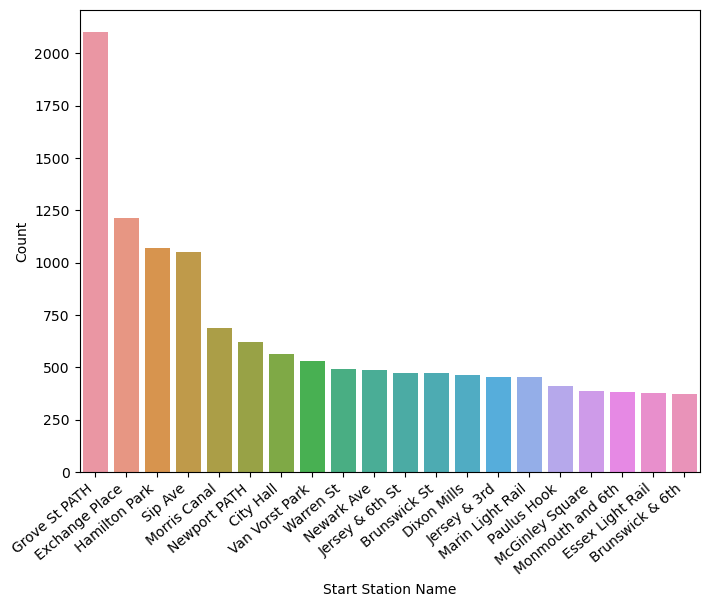

In [76]:
plt.figure(figsize=(8,6)) # this creates a figure 8 inch wide, 4 inch high
ax=sns.barplot(data=Top_20_pickup_locations, x="Start Station Name", y= "Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#plt.tight_layout()
#plt.show()
#sns.countplot(x="Start Station Name", data=Top_20_pickup_locations)
#plt.show()